# **Projeto Premier Ligue**

## **Explorando a base**

_**Objetivo:**_ Prever o resultado de uma partida. Com esse modelo, podemos ter a possibilidade de indicar qual a melhor estratégia a se seguir em partidas ou em caso de casas de apostas regular o valor de apostas de acordo com a probabilidade de vitória de uma time dentro da partida.

Tipo de modelo: **Supervisionado**

Target: **HT Result**

Esse modelo conta com 2 conjuntos de dados compostos por 25 variáveis ​​diferentes, vistas abaixo, que contêm dados históricos que vão de 1993/94 a 2024/25 (meio da temporada). Perfeito para entender a história do mais alto nível do futebol inglês.

| Colunas       | Descrição                                                                                                              |
|---------------|------------------------------------------------------------------------------------------------------------------------|
| Date          | A data em que a partida foi disputada                                                                                  |
| Season        | A temporada de futebol em que a partida ocorreu (geralmente abrange dois anos, por exemplo, 2023‑24)                    |
| HomeTeam      | O time que joga em seu estádio                                                                                         |
| AwayTeam      | O time visitante                                                                                                       |
| FTH Goals     | Gols em casa no tempo integral (total de gols marcados pelo time da casa ao final da partida)                         |
| FTA Goals     | Gols fora de casa no tempo integral (total de gols marcados pelo time visitante ao final da partida)                 |
| FT Result     | Resultado no tempo integral (normalmente H para vitória em casa, A para vitória fora, D para empate)                   |
| HTH Goals     | Gols em casa no intervalo (gols marcados pelo time da casa no intervalo)                                               |
| HTA Goals     | Gols fora de casa no intervalo (gols marcados pelo time visitante no intervalo)                                        |
| HT Result     | Resultado no intervalo (H mandante liderando, A visitante liderando, D empate no intervalo)                           |
| Referee       | Nome do árbitro da partida                                                                                             |
| H Shots       | Total de chutes tentados pelo time da casa                                                                             |
| A Shots       | Total de chutes tentados pelo time visitante                                                                           |
| H SOT         | Chutes a gol do time da casa (chutes do time da casa que foram no gol)                                                |
| A SOT         | Chutes a gol do time visitante (chutes do time visitante que foram no gol)                                            |
| H Fouls       | Número de faltas cometidas pelo time da casa                                                                           |
| A Fouls       | Número de faltas cometidas pelo time visitante                                                                         |
| H Corners     | Escanteios concedidos ao time da casa                                                                                  |
| A Corners     | Escanteios concedidos ao time visitante                                                                                |
| H Yellow      | Cartões amarelos mostrados aos jogadores do time da casa                                                               |
| A Yellow      | Cartões amarelos mostrados aos jogadores do time visitante                                                             |
| H Red         | Cartões vermelhos mostrados aos jogadores do time da casa                                                              |
| A Red         | Cartões vermelhos mostrados aos jogadores do time visitante                                                            |
| Display_Order | Sistema de ordenação numérica para exibição das partidas (provavelmente usado para classificação ou apresentação)       |
| League        | A competição ou liga em que a partida foi disputada                                                                    |


Importando bibliotecas:

In [196]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
import os

Funções auxiliares.

In [197]:
def count_types(df):
    # Colunas numéricas (int, float, etc.)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Colunas de data/hora
    datetime_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns
    
    # Colunas categóricas (object, category)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    return f"numerica: {len(numeric_cols)}, categorica: {len(categorical_cols)}, datetime:{len(datetime_cols)}"
    

Importando e criando dataframe de nossos datasets.

In [198]:
# Obtém o diretório de trabalho atual
current_dir = os.getcwd()

parent_dir = os.path.dirname(current_dir)

# Constrói o caminho completo para o arquivo CSV
csv_path1 = os.path.join(parent_dir, 'base_de_dados', 'England 2 CSV.csv')

csv_path2 = os.path.join(parent_dir, 'base_de_dados', 'England CSV.csv')

In [199]:
df_e1 = pd.read_csv(csv_path1)

df_e2 = pd.read_csv(csv_path2)

Como os dois arquivos possuem um dataframe de mesmo formato e informações, vamos unificá-los em um só para facilitar a análise. Para exibi-los, iremos mostrar as 5 primeiras linhas.

In [200]:
df = pd.concat([df_e1, df_e2])

df.head(5)

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,15/01/2025,2024/25,Blackburn,Portsmouth,3,0,H,0.0,0.0,D,...,15.0,19.0,5.0,6.0,1.0,3.0,0.0,0.0,20250115,English Second
1,14/01/2025,2024/25,Cardiff,Watford,1,1,D,0.0,0.0,D,...,8.0,14.0,7.0,3.0,1.0,2.0,0.0,0.0,20250114,English Second
2,14/01/2025,2024/25,Plymouth,Oxford,1,1,D,0.0,1.0,A,...,8.0,10.0,6.0,3.0,1.0,1.0,0.0,0.0,20250114,English Second
3,6/01/2025,2024/25,QPR,Luton,2,1,H,1.0,1.0,D,...,10.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,20250106,English Second
4,5/01/2025,2024/25,Sunderland,Portsmouth,1,0,H,1.0,0.0,H,...,9.0,10.0,7.0,3.0,1.0,2.0,0.0,1.0,20250105,English Second


In [201]:
print(f'Ligas consideradas: {df["League"].nunique()}')
print(f'{df["League"].unique()}')
print(f'Clubes considerados: {df["HomeTeam"].nunique()}')

Ligas consideradas: 2
['English Second' 'Premier League']
Clubes considerados: 70


Como temos dados da primeira e segunda divisão, iremos fazer o modelo baseado na primeira divisão.

In [202]:
df = df[df['League'] == 'Premier League']

Como o objetivo desse modelo é predizer o time que vencerá uma partida, removeremos as colunas "FTH Goals" e "FTA Goals" pois representam o total de gols marcados em uma partida mostrando o resultado final do jogo, a intenção é prever o resultado de uma jogo que ainda não terminou dessa forma não seríamos alimentados por esses dados.

In [203]:
df = df.drop(columns=['FTH Goals', 'FTA Goals'])

Vamos analisar as características iniciais deste dataframe.

In [204]:
print(f"""
Tamanho df: {len(df)} 
Qtd. de colunas: {len(df.columns)}
Qtd. de tipos de colunas: {count_types(df)}
""")


Tamanho df: 12153 
Qtd. de colunas: 23
Qtd. de tipos de colunas: numerica: 15, categorica: 8, datetime:0



Como podemos notar, ao observar as primeiras linhas do dataframe, vemos que temos uma coluna de datas. No entanto, a função que criamos para identificar os tipos de valores não identificou os valores da coluna data como datetime. Portanto, será necessário converter a coluna e seus valores para garantir o correto funcionamento de nosso modelo.

In [205]:
# Converter colunas numéricas para float
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].astype(float)

# Converter a coluna "Date" para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Converter colunas categóricas para string
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].astype(str)

Após o ajuste, utilizaremos a função novamente para identifcar os tipos corretamente. Observe que agora o dataframe reflete corretamente os tipos de variáveis

In [206]:
print(f"Qtd. de tipos de colunas: {count_types(df)}")

Qtd. de tipos de colunas: numerica: 15, categorica: 7, datetime:1


In [207]:
null_proportion = round((df.isna().sum() / len(df)) * 100,0)
null_summary = pd.DataFrame({
    'Cont. de nulos': df.isna().sum(),
    'Proporção de nulos (%)': null_proportion
})

print(f"Cont. duplicados: {df.duplicated().sum()}\n\n")
print('--'*50)
print(null_summary)

Cont. duplicados: 0


----------------------------------------------------------------------------------------------------
               Cont. de nulos  Proporção de nulos (%)
Date                        0                     0.0
Season                      0                     0.0
HomeTeam                    0                     0.0
AwayTeam                    0                     0.0
FT Result                   0                     0.0
HTH Goals                 924                     8.0
HTA Goals                 924                     8.0
HT Result                   0                     0.0
Referee                     0                     0.0
H Shots                  2824                    23.0
A Shots                  2824                    23.0
H SOT                    2824                    23.0
A SOT                    2824                    23.0
H Fouls                  2824                    23.0
A Fouls                  2824                    23.0
H Corners    

Como temos 8 colunas categóricas para análise inicial das principais estatísticas (count, mean, std, min, 10%, 25%, 50%, 90% e max), vamos criar um dataframe parcial só com variáveis numéricas. Além disso, para avaliar como os times que venceram, perderam e empataram se comportaram dentro dessas análises vamos separar esse dataframe parcial em outros três e realizar esse análise.

In [208]:
df_p = df[numeric_cols].drop('Display_Order', axis=1, errors='ignore')

df_p.describe(percentiles=[0.25, 0.5, 0.75, 0.95])

,HTH Goals,HTA Goals,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red
count,11229.000000,11229.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000
mean,0.689554,0.511265,13.618716,10.784543,6.007503,4.704684,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968
std,0.838796,0.731610,5.349420,4.678710,3.275177,2.757288,3.752442,3.931377,3.107327,2.746754,1.215747,1.285168,0.252706,0.291579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,12.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
95%,2.000000,2.000000,23.000000,19.000000,12.000000,10.000000,18.000000,19.000000,12.000000,10.000000,4.000000,4.000000,1.000000,1.000000
max,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,33.000000,29.000000,20.000000,19.000000,7.000000,9.000000,3.000000,2.000000


### **Observações**

- Times que jogam em casa em média marcam mais gols que times que jogam fora de casa;
- Times em casa em média arriscam mais chutes a gol do que os visitantes, ao mesmo tempo que fazem menos faltas, ou seja, promovem menos anti-jogo. Lembrando que as médias são muito próximas 
- Times que jogam em casa em média possuem mais escanteios marcados;
- Times que jogam em casa em média recebem menos cartões amarelos e vermelhos, ou seja, promovem mais jogo limpo;


_Conclusão:_ Times que jogam em casa promevem menos anti-jogo, mais jogo limpo, chutam mais a gol e por consequência marcam mais gols também.


### **Análises Visuais**

- Distribuição de resultados

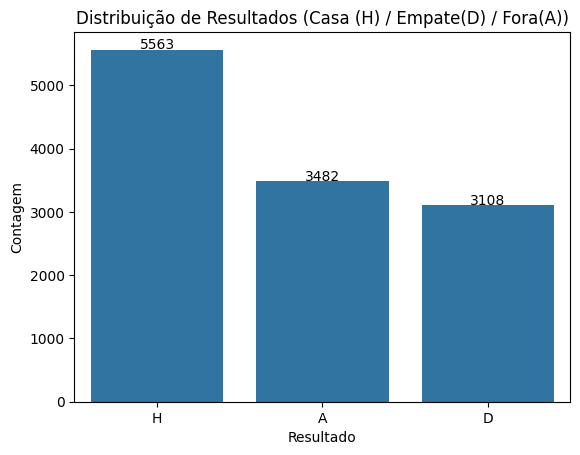

In [209]:
# Contagem de resultados
result_counts = df['FT Result'].value_counts()

# Ordenar em ordem decrescente
result_counts = result_counts.sort_values(ascending=False)

# Criar o gráfico de barras
sns.barplot(x=result_counts.index, y=result_counts.values)

# Adicionar rótulos
plt.title('Distribuição de Resultados (Casa (H) / Empate(D) / Fora(A))')
plt.xlabel('Resultado')
plt.ylabel('Contagem')

# Adicionar os valores no topo das barras
for i, value in enumerate(result_counts.values):
    plt.text(i, value + 10, str(value), ha='center')

plt.show()

**Observação:** Os times venceram 20% a mais em casa do que fora.

-  Times que venceram em casa marcando gol no primeiro tempo

C:\Users\leona\AppData\Local\Temp\ipykernel_2148\4214022954.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')


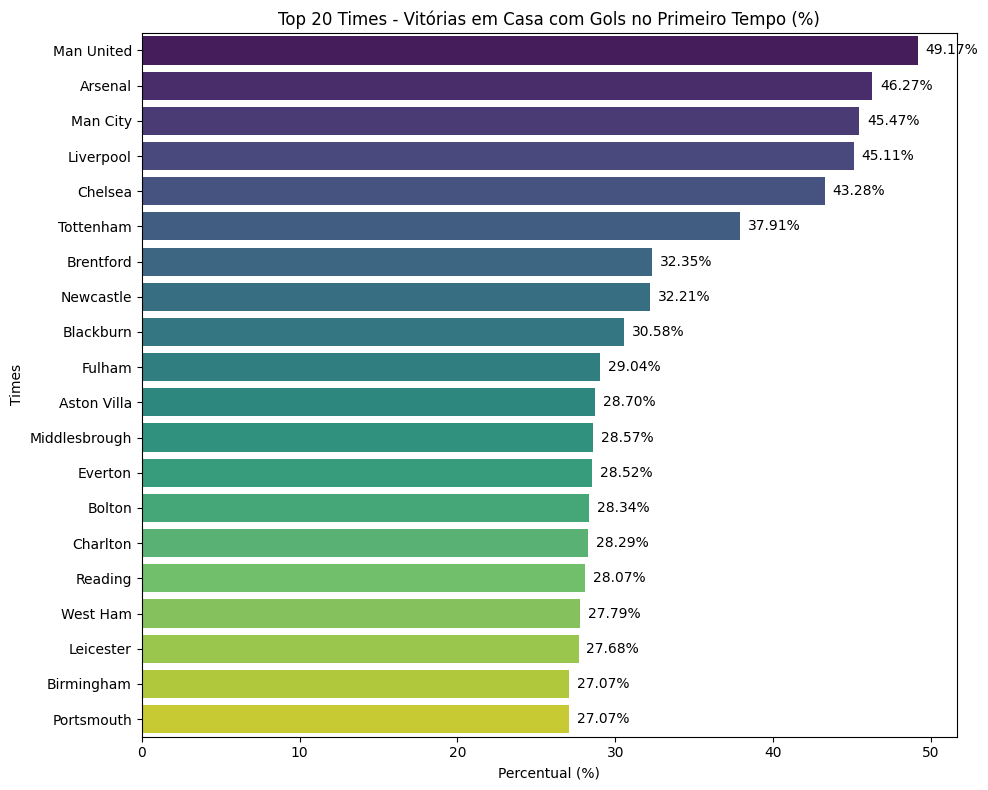

In [210]:
# Quantos times você quer no top
top_n = 20

# 1) Total de jogos em casa por time
total_home = df.groupby('HomeTeam').size()

# 2) Jogos em que o mandante venceu e fez gol no primeiro tempo
win_first_half = (
    df
    .loc[(df['FT Result'] == 'H') & (df['HTH Goals'] > 0)]
    .groupby('HomeTeam')
    .size()
)

# 3) Calcular percentual e selecionar top N
top_teams = (
    (win_first_half / total_home * 100)
    .fillna(0)                      # substitui NaN por 0 para quem não teve ocorrências
    .sort_values(ascending=False)   # do maior para o menor
    .head(top_n)
)

# 4) Plotar
plt.figure(figsize=(10, 8))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')

plt.title(f'Top {top_n} Times - Vitórias em Casa com Gols no Primeiro Tempo (%)')
plt.xlabel('Percentual (%)')
plt.ylabel('Times')

# Adicionar os valores no topo das barras
for i, value in enumerate(top_teams.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.show()


- Times que venceram em casa marcando gol no primeiro tempo

C:\Users\leona\AppData\Local\Temp\ipykernel_2148\1662836788.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')


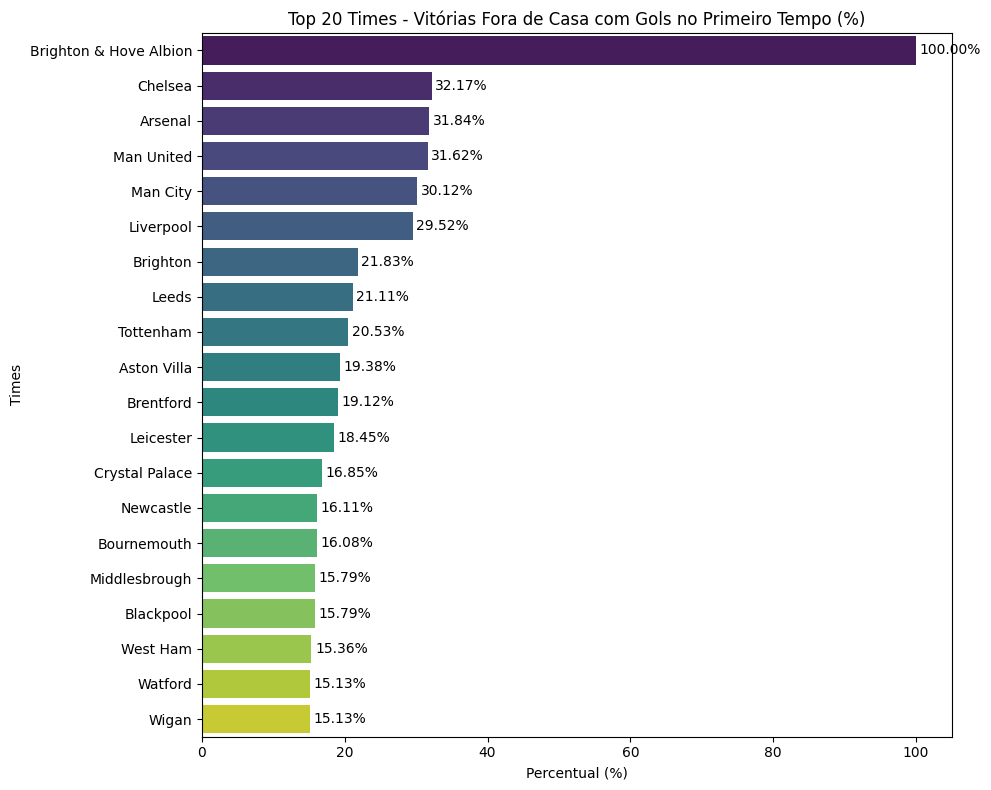

In [211]:
# Quantos times você quer no top
top_n = 20

# 1) Total de jogos em casa por time
total_home = df.groupby('HomeTeam').size()

# 2) Jogos em que o mandante venceu e fez gol no primeiro tempo
win_first_half = (
    df
    .loc[(df['FT Result'] == 'A') & (df['HTA Goals'] > 0)]
    .groupby('AwayTeam')
    .size()
)

# 3) Calcular percentual e selecionar top N
top_teams = (
    (win_first_half / total_home * 100)
    .fillna(0)                      # substitui NaN por 0 para quem não teve ocorrências
    .sort_values(ascending=False)   # do maior para o menor
    .head(top_n)
)

# 4) Plotar
plt.figure(figsize=(10, 8))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')

plt.title(f'Top {top_n} Times - Vitórias Fora de Casa com Gols no Primeiro Tempo (%)')
plt.xlabel('Percentual (%)')
plt.ylabel('Times')

# Adicionar os valores no topo das barras
for i, value in enumerate(top_teams.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.show()


-  Times que empatram marcando gol no primeiro tempo

C:\Users\leona\AppData\Local\Temp\ipykernel_2148\3473040245.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')


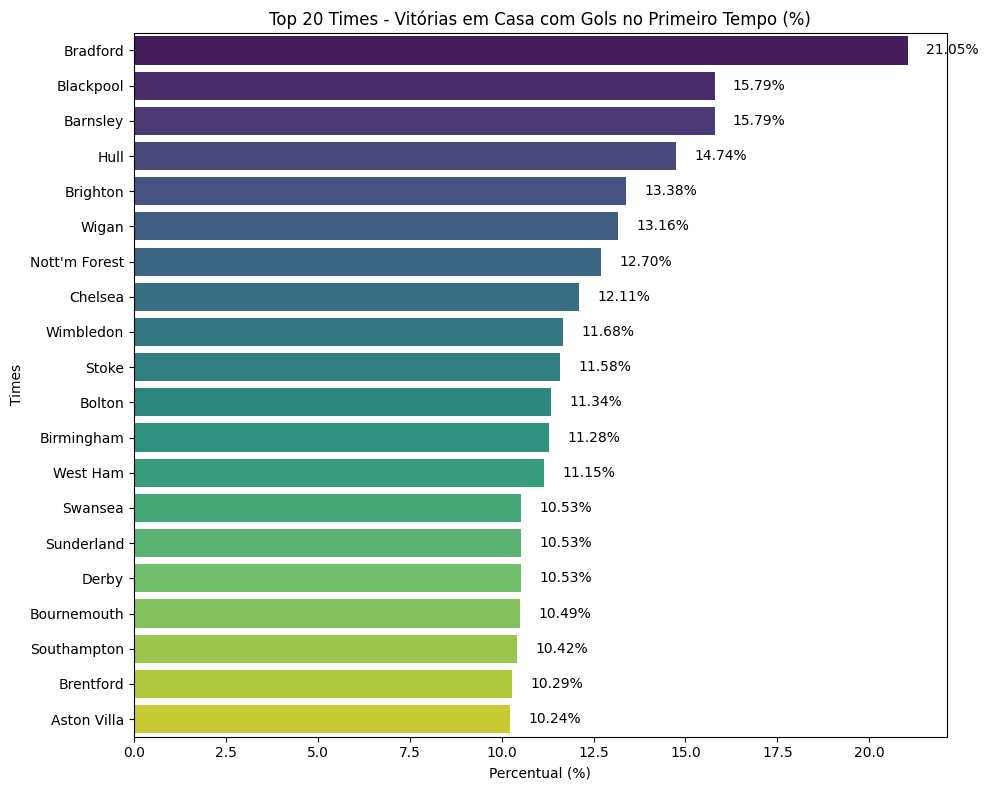

In [212]:
# Quantos times você quer no top
top_n = 20

# 1) Total de jogos em casa por time
total_home = df.groupby('HomeTeam').size()

# 2) Jogos em que o mandante venceu e fez gol no primeiro tempo
win_first_half = (
    df
    .loc[(df['FT Result'] == 'D') & ((df['HTH Goals'] > 0) | (df['HTH Goals'] > 0))]
    .groupby('HomeTeam')
    .size()
)

# 3) Calcular percentual e selecionar top N
top_teams = (
    (win_first_half / total_home * 100)
    .fillna(0)                      # substitui NaN por 0 para quem não teve ocorrências
    .sort_values(ascending=False)   # do maior para o menor
    .head(top_n)
)

# 4) Plotar
plt.figure(figsize=(10, 8))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')

plt.title(f'Top {top_n} Times - Vitórias em Casa com Gols no Primeiro Tempo (%)')
plt.xlabel('Percentual (%)')
plt.ylabel('Times')

# Adicionar os valores no topo das barras
for i, value in enumerate(top_teams.values):
    plt.text(value + 0.5, i, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.show()


- Percentual de times vitórias que tiveram gols marcados no primeiro tempo

C:\Users\leona\AppData\Local\Temp\ipykernel_2148\3424207588.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=vals, palette='viridis')


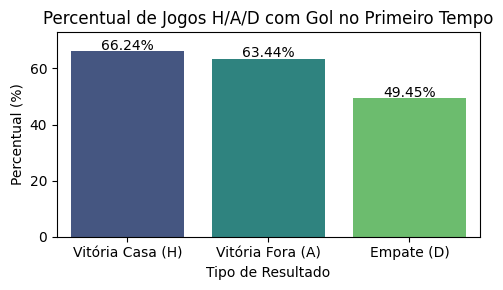

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Contagem total de jogos por resultado (H, A, D)
result_counts = df['FT Result'].value_counts()

# 2) Contagem de jogos com gol no 1º tempo para cada resultado
first_half_hits = {
    'H': df.loc[(df['FT Result']=='H') & (df['HTH Goals'] > 0)].shape[0],
    'A': df.loc[(df['FT Result']=='A') & (df['HTA Goals'] > 0)].shape[0],
    # para D, consideramos qualquer gol no 1º tempo
    'D': df.loc[(df['FT Result']=='D') & ((df['HTH Goals'] + df['HTA Goals']) > 0)].shape[0]
}

# 3) Cálculo do percentual
percentages = { 
    res: (first_half_hits[res] / result_counts[res] * 100) 
    for res in ['H','A','D']
}

# 4) Preparar dados para plot
labels = ['Vitória Casa (H)', 'Vitória Fora (A)', 'Empate (D)']
vals   = [percentages['H'], percentages['A'], percentages['D']]

# 5) Plotar
plt.figure(figsize=(5, 3))
sns.barplot(x=labels, y=vals, palette='viridis')

plt.title('Percentual de Jogos H/A/D com Gol no Primeiro Tempo')
plt.xlabel('Tipo de Resultado')
plt.ylabel('Percentual (%)')

# adicionar valores no topo das barras
for i, v in enumerate(vals):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

plt.ylim(0, max(vals) * 1.1)
plt.tight_layout()
plt.show()


- Percentual de jogos que houve empate com gols no primeiro tempo

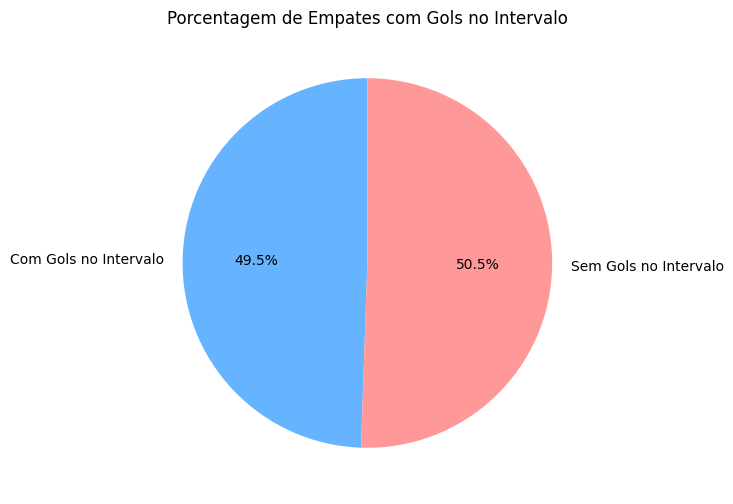

In [214]:
# Filtrar os empates
draws = df[df['FT Result'] == 'D']
draws_with_goals_ht = draws.loc[(draws['HTH Goals'] > 0) | (draws['HTA Goals'] > 0)]

# Calcular a quantidade de empates com e sem gols no intervalo
draws_with_goals_count = len(draws_with_goals_ht)
draws_without_goals_count = len(draws) - draws_with_goals_count

# Dados para o gráfico
labels = ['Com Gols no Intervalo', 'Sem Gols no Intervalo']
sizes = [draws_with_goals_count, draws_without_goals_count]
colors = ['#66b3ff', '#ff9999']

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Porcentagem de Empates com Gols no Intervalo')
plt.show()

- Quando o time visitante vence, quais são suas características básicas da vitória?

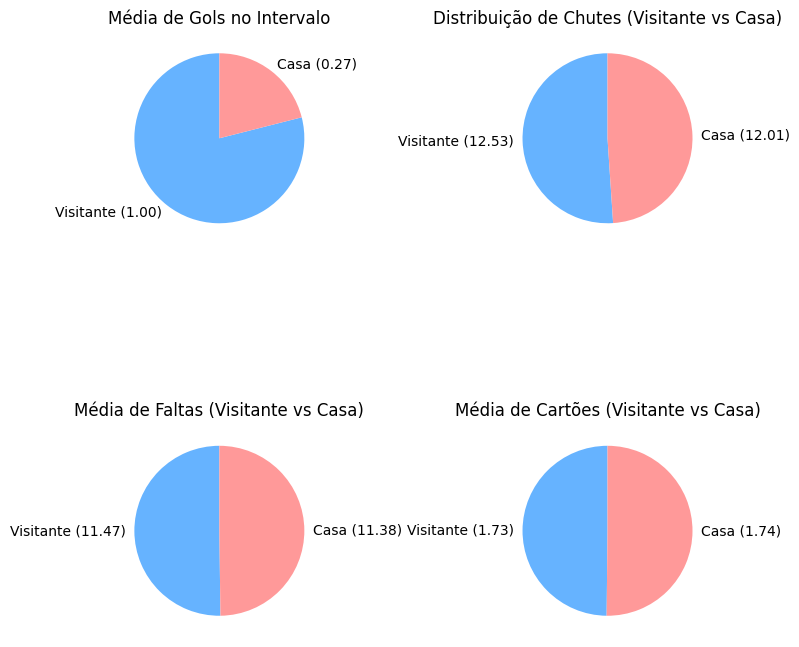

In [215]:
df_vit_visit = df[df['FT Result'] == 'A']

gols_casa = df_vit_visit['H Shots'].mean()
gols_visit = df_vit_visit['A Shots'].mean()

# Dados para os novos gráficos
gols_casa_2 = df_vit_visit['HTH Goals'].mean()
gols_visit_2 = df_vit_visit['HTA Goals'].mean()

faltas_casa = df_vit_visit['H Fouls'].mean()
faltas_visit = df_vit_visit['A Fouls'].mean()

cartoes_casa = df_vit_visit['H Yellow'].mean() + df_vit_visit['H Red'].mean()
cartoes_visit = df_vit_visit['A Yellow'].mean() + df_vit_visit['A Red'].mean()

# Criar subplots com 2 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Primeiro gráfico (já existente)
axes[0, 1].pie(
    [gols_visit, gols_casa], 
    labels=[f'Visitante ({gols_visit:.2f})', f'Casa ({gols_casa:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[0, 1].set_title('Distribuição de Chutes (Visitante vs Casa)')

# Segundo gráfico (gols no intervalo)
axes[0, 0].pie(
    [gols_visit_2, gols_casa_2], 
    labels=[f'Visitante ({gols_visit_2:.2f})', f'Casa ({gols_casa_2:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[0, 0].set_title('Média de Gols no Intervalo')

# Terceiro gráfico (faltas)
axes[1, 0].pie(
    [faltas_visit, faltas_casa], 
    labels=[f'Visitante ({faltas_visit:.2f})', f'Casa ({faltas_casa:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[1, 0].set_title('Média de Faltas (Visitante vs Casa)')

# Quarto gráfico (cartões)
axes[1, 1].pie(
    [cartoes_visit, cartoes_casa], 
    labels=[f'Visitante ({cartoes_visit:.2f})', f'Casa ({cartoes_casa:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[1, 1].set_title('Média de Cartões (Visitante vs Casa)')

# Ajustar layout
plt.tight_layout()
plt.show()

- Quando o time de casa vence, quais são suas características básicas?

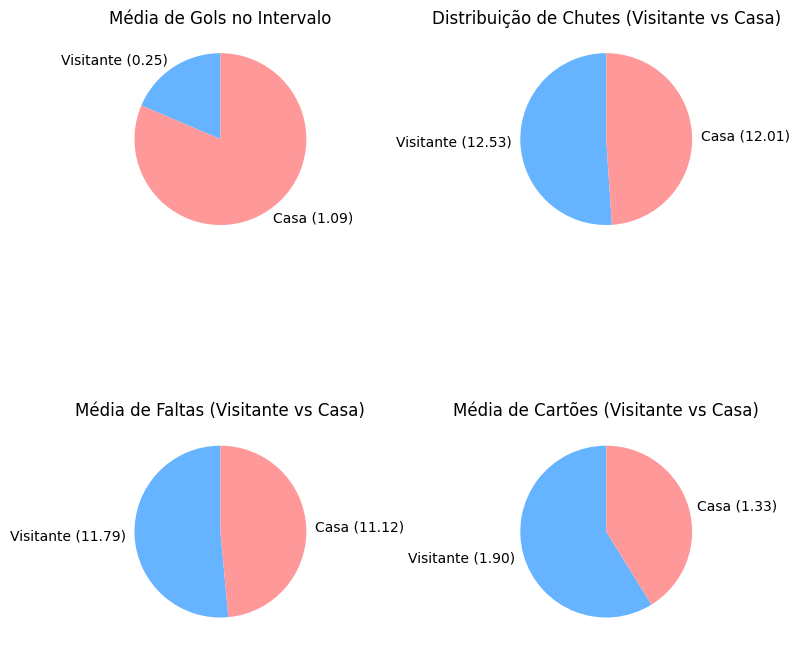

In [216]:
df_casa_visit = df[df['FT Result'] == 'H']

gols_casa = df_vit_visit['H Shots'].mean()
gols_visit = df_vit_visit['A Shots'].mean()

# Dados para os novos gráficos
gols_casa_2 = df_casa_visit['HTH Goals'].mean()
gols_visit_2 = df_casa_visit['HTA Goals'].mean()

faltas_casa = df_casa_visit['H Fouls'].mean()
faltas_visit = df_casa_visit['A Fouls'].mean()

cartoes_casa = df_casa_visit['H Yellow'].mean() + df_casa_visit['H Red'].mean()
cartoes_visit = df_casa_visit['A Yellow'].mean() + df_casa_visit['A Red'].mean()

# Criar subplots com 2 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Primeiro gráfico (já existente)
axes[0, 1].pie(
    [gols_visit, gols_casa], 
    labels=[f'Visitante ({gols_visit:.2f})', f'Casa ({gols_casa:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[0, 1].set_title('Distribuição de Chutes (Visitante vs Casa)')

# Segundo gráfico (gols no intervalo)
axes[0, 0].pie(
    [gols_visit_2, gols_casa_2], 
    labels=[f'Visitante ({gols_visit_2:.2f})', f'Casa ({gols_casa_2:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[0, 0].set_title('Média de Gols no Intervalo')

# Terceiro gráfico (faltas)
axes[1, 0].pie(
    [faltas_visit, faltas_casa], 
    labels=[f'Visitante ({faltas_visit:.2f})', f'Casa ({faltas_casa:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[1, 0].set_title('Média de Faltas (Visitante vs Casa)')

# Quarto gráfico (cartões)
axes[1, 1].pie(
    [cartoes_visit, cartoes_casa], 
    labels=[f'Visitante ({cartoes_visit:.2f})', f'Casa ({cartoes_casa:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[1, 1].set_title('Média de Cartões (Visitante vs Casa)')

# Ajustar layout
plt.tight_layout()
plt.show()

- Quando ocorre empate, quais são suas características básicas?

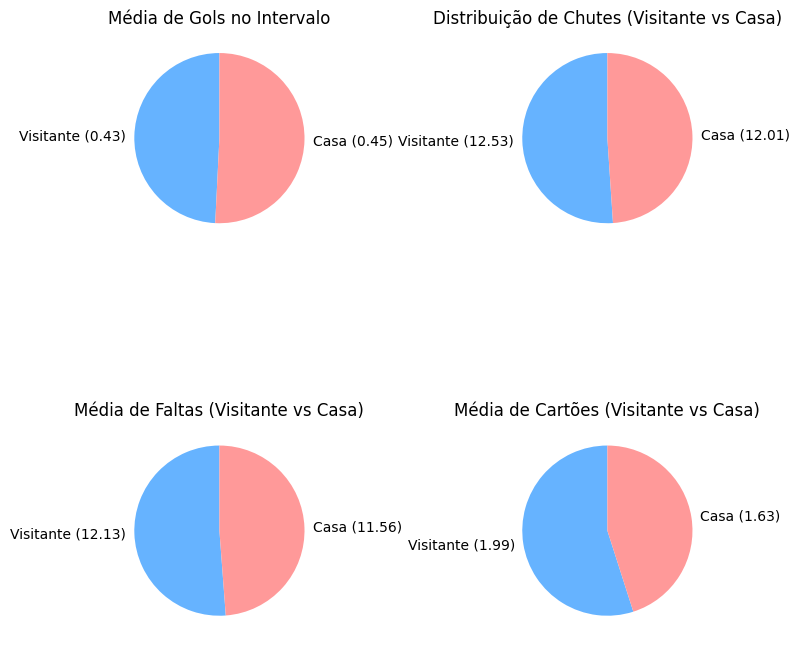

In [217]:
df_empate = df[df['FT Result'] == 'D']

gols_casa = df_vit_visit['H Shots'].mean()
gols_visit = df_vit_visit['A Shots'].mean()

# Dados para os novos gráficos
gols_casa_2 = df_empate['HTH Goals'].mean()
gols_visit_2 = df_empate['HTA Goals'].mean()

faltas_casa = df_empate['H Fouls'].mean()
faltas_visit = df_empate['A Fouls'].mean()

cartoes_casa = df_empate['H Yellow'].mean() + df_empate['H Red'].mean()
cartoes_visit = df_empate['A Yellow'].mean() + df_empate['A Red'].mean()

# Criar subplots com 2 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Primeiro gráfico (já existente)
axes[0, 1].pie(
    [gols_visit, gols_casa], 
    labels=[f'Visitante ({gols_visit:.2f})', f'Casa ({gols_casa:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[0, 1].set_title('Distribuição de Chutes (Visitante vs Casa)')

# Segundo gráfico (gols no intervalo)
axes[0, 0].pie(
    [gols_visit_2, gols_casa_2], 
    labels=[f'Visitante ({gols_visit_2:.2f})', f'Casa ({gols_casa_2:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[0, 0].set_title('Média de Gols no Intervalo')

# Terceiro gráfico (faltas)
axes[1, 0].pie(
    [faltas_visit, faltas_casa], 
    labels=[f'Visitante ({faltas_visit:.2f})', f'Casa ({faltas_casa:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[1, 0].set_title('Média de Faltas (Visitante vs Casa)')

# Quarto gráfico (cartões)
axes[1, 1].pie(
    [cartoes_visit, cartoes_casa], 
    labels=[f'Visitante ({cartoes_visit:.2f})', f'Casa ({cartoes_casa:.2f})'], 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
axes[1, 1].set_title('Média de Cartões (Visitante vs Casa)')

# Ajustar layout
plt.tight_layout()
plt.show()

**Observação:** Os times que vencem tanto em casa quanto como visitantes, possuem as mesmas características ofencisavas:
- Em média maior volumes de gol na partida, geralmente marcando em média os gols no primeiro tempo de jogo;

No entanto as características defensivas mudam de comportamento:
- Times que jogam em casa ao vencerem fazem menos faltas e recebem menos cartões em média;
- No entanto os times que jogam em casa ao perderem também fazem menos faltas e recebem menos cartões em média;

- Boxplot

C:\Users\leona\AppData\Local\Temp\ipykernel_2148\2516274062.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\leona\AppData\Local\Temp\ipykernel_2148\2516274062.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\leona\AppData\Local\Temp\ipykernel_2148\2516274062.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\leona\AppData\Local\Temp\ipykernel_2148\2516274062.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

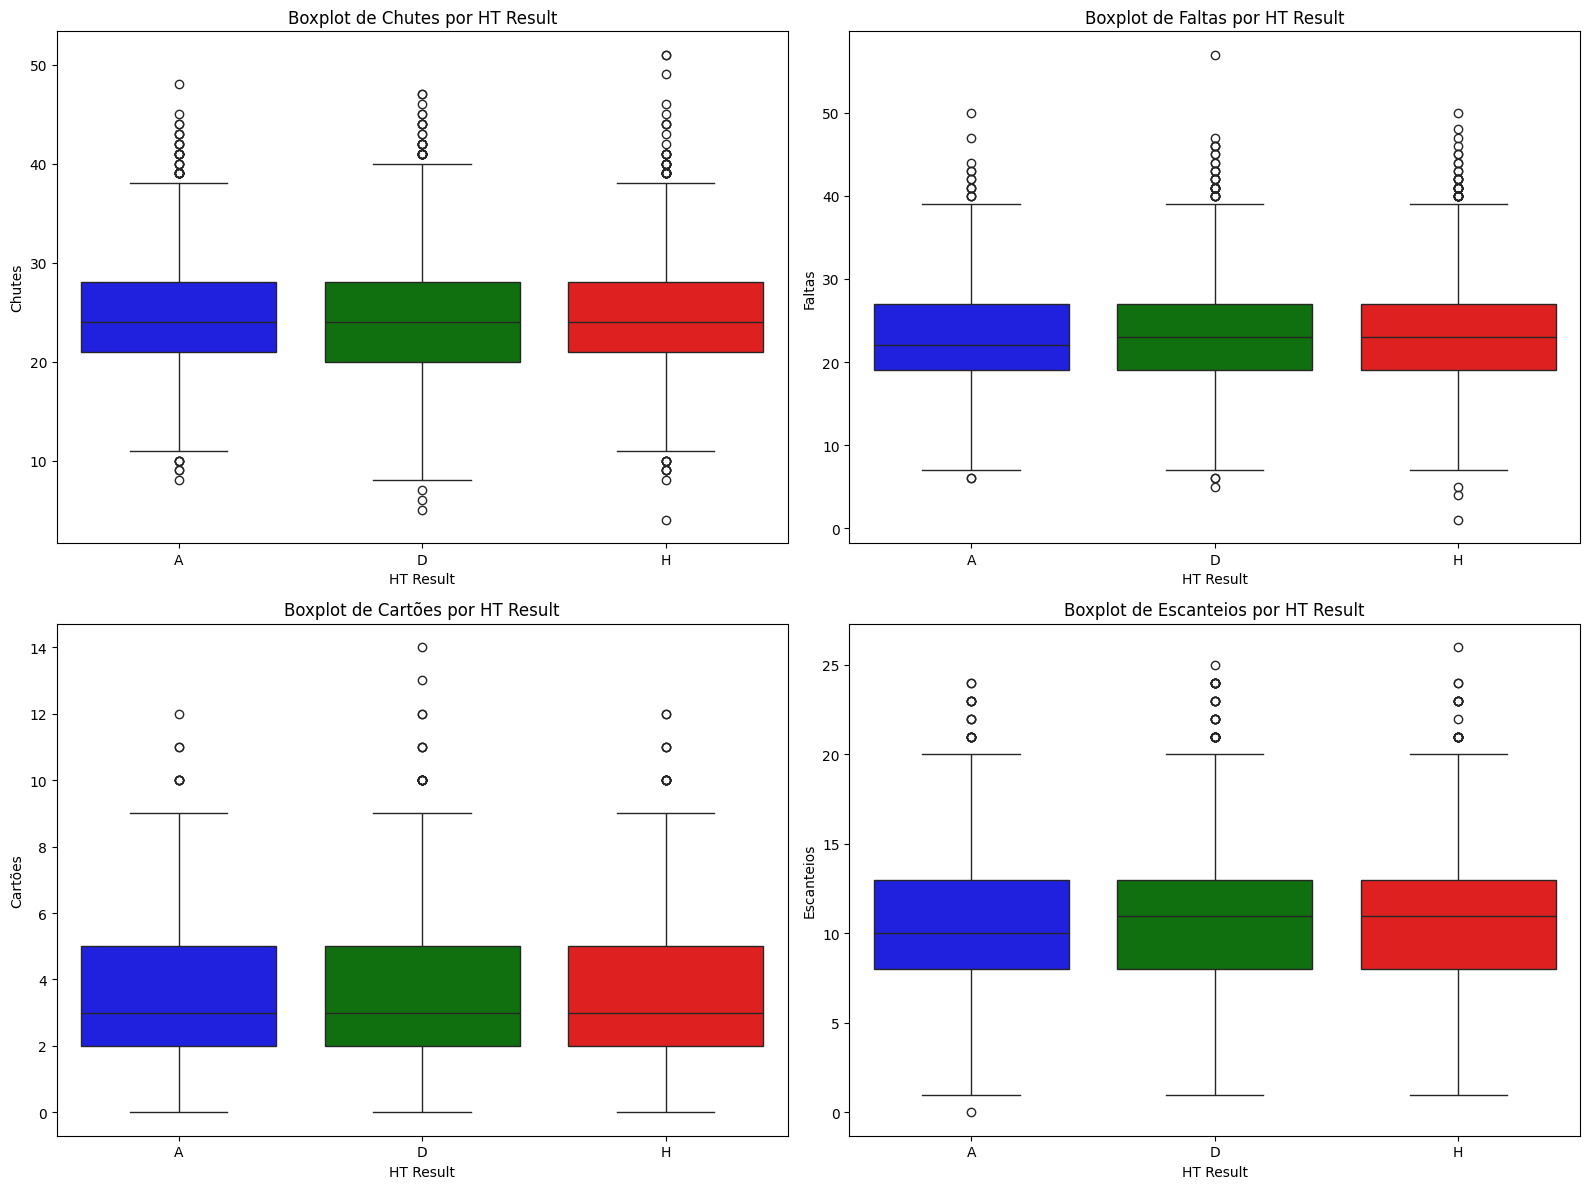

In [218]:
# 0) Definir as métricas
metrics = {
    'Chutes':      ['H Shots', 'A Shots'],
    'Faltas':    ['H Fouls',   'A Fouls'],
    'Cartões':   ['H Yellow',  'A Yellow', 'H Red', 'A Red'],
    'Escanteios':['H Corners', 'A Corners']
}

# 1) Remover linhas que tenham NaN em HT Result ou em qualquer uma das colunas usadas
cols_para_drop = ['HT Result'] + [col for cols in metrics.values() for col in cols]
df_cleaned = df.dropna(subset=cols_para_drop).copy()

# 2) Criar colunas de soma para cada métrica
for metric, cols in metrics.items():
    soma_col = f'{metric}_sum'
    df_cleaned[soma_col] = df_cleaned[cols].sum(axis=1)

# 3) Plotar os 4 boxplots em 2x2
plt.figure(figsize=(16, 12))
palette = {'H': 'red', 'A': 'blue', 'D': 'green'}

for i, metric in enumerate(metrics, start=1):
    soma_col = f'{metric}_sum'
    plt.subplot(2, 2, i)
    sns.boxplot(
        data=df_cleaned,
        x='HT Result',
        y=soma_col,
        palette=palette
    )
    plt.title(f'Boxplot de {metric} por HT Result')
    plt.xlabel('HT Result')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()


**Observações:**

Não há diferenças substacial nas estatísticas de chutes, faltas, cartões ou escanteios. As medianas e dispersões centrais são quase idênticas, o que indica que esses indicadores não discriminam claramente se um time está ganhando, empatando ou perdendo no intervalo. Talvez diga melhor no olhar individual de cada partida.

- Percentual de acerto de chutes a gol nos jogos que o time da casa venceu

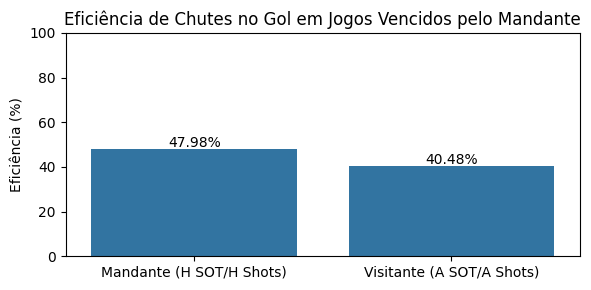

In [219]:
# 1) Filtrar apenas os jogos que o mandante venceu
home_wins = df[df['FT Result'] == 'H'].copy()

# 2) Calcular a eficiência agregada de todo o conjunto de jogos
home_ratio = home_wins['H SOT'].sum() / home_wins['H Shots'].sum() * 100
away_ratio = home_wins['A SOT'].sum() / home_wins['A Shots'].sum() * 100

# 3) Plotar o gráfico de barras com as duas ratios
plt.figure(figsize=(6, 3))
sns.barplot(x=['Mandante (H SOT/H Shots)', 'Visitante (A SOT/A Shots)'],
            y=[home_ratio, away_ratio])

# Ajustes visuais
plt.ylim(0, 100)
plt.title('Eficiência de Chutes no Gol em Jogos Vencidos pelo Mandante')
plt.ylabel('Eficiência (%)')

# Anotar os valores no topo de cada barra
for i, val in enumerate([home_ratio, away_ratio]):
    plt.text(i, val + 1, f"{val:.2f}%", ha='center')

plt.tight_layout()
plt.show()

- Percentual de acerto de chutes a gol nos jogos que o time vistante venceu

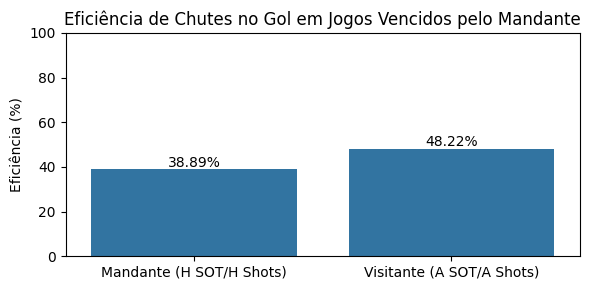

In [220]:
# 1) Filtrar apenas os jogos que o mandante venceu
home_wins = df[df['FT Result'] == 'A'].copy()

# 2) Calcular a eficiência agregada de todo o conjunto de jogos
home_ratio = home_wins['H SOT'].sum() / home_wins['H Shots'].sum() * 100
away_ratio = home_wins['A SOT'].sum() / home_wins['A Shots'].sum() * 100

# 3) Plotar o gráfico de barras com as duas ratios
plt.figure(figsize=(6, 3))
sns.barplot(x=['Mandante (H SOT/H Shots)', 'Visitante (A SOT/A Shots)'],
            y=[home_ratio, away_ratio])

# Ajustes visuais
plt.ylim(0, 100)
plt.title('Eficiência de Chutes no Gol em Jogos Vencidos pelo Mandante')
plt.ylabel('Eficiência (%)')

# Anotar os valores no topo de cada barra
for i, val in enumerate([home_ratio, away_ratio]):
    plt.text(i, val + 1, f"{val:.2f}%", ha='center')

plt.tight_layout()
plt.show()

- Percentual de acerto de chutes a gol nos jogos que houve empate

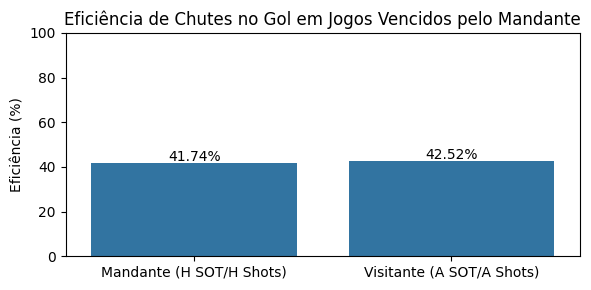

In [221]:
# 1) Filtrar apenas os jogos que o mandante venceu
home_wins = df[df['FT Result'] == 'D'].copy()

# 2) Calcular a eficiência agregada de todo o conjunto de jogos
home_ratio = home_wins['H SOT'].sum() / home_wins['H Shots'].sum() * 100
away_ratio = home_wins['A SOT'].sum() / home_wins['A Shots'].sum() * 100

# 3) Plotar o gráfico de barras com as duas ratios
plt.figure(figsize=(6, 3))
sns.barplot(x=['Mandante (H SOT/H Shots)', 'Visitante (A SOT/A Shots)'],
            y=[home_ratio, away_ratio])

# Ajustes visuais
plt.ylim(0, 100)
plt.title('Eficiência de Chutes no Gol em Jogos Vencidos pelo Mandante')
plt.ylabel('Eficiência (%)')

# Anotar os valores no topo de cada barra
for i, val in enumerate([home_ratio, away_ratio]):
    plt.text(i, val + 1, f"{val:.2f}%", ha='center')

plt.tight_layout()
plt.show()

- Curva normal

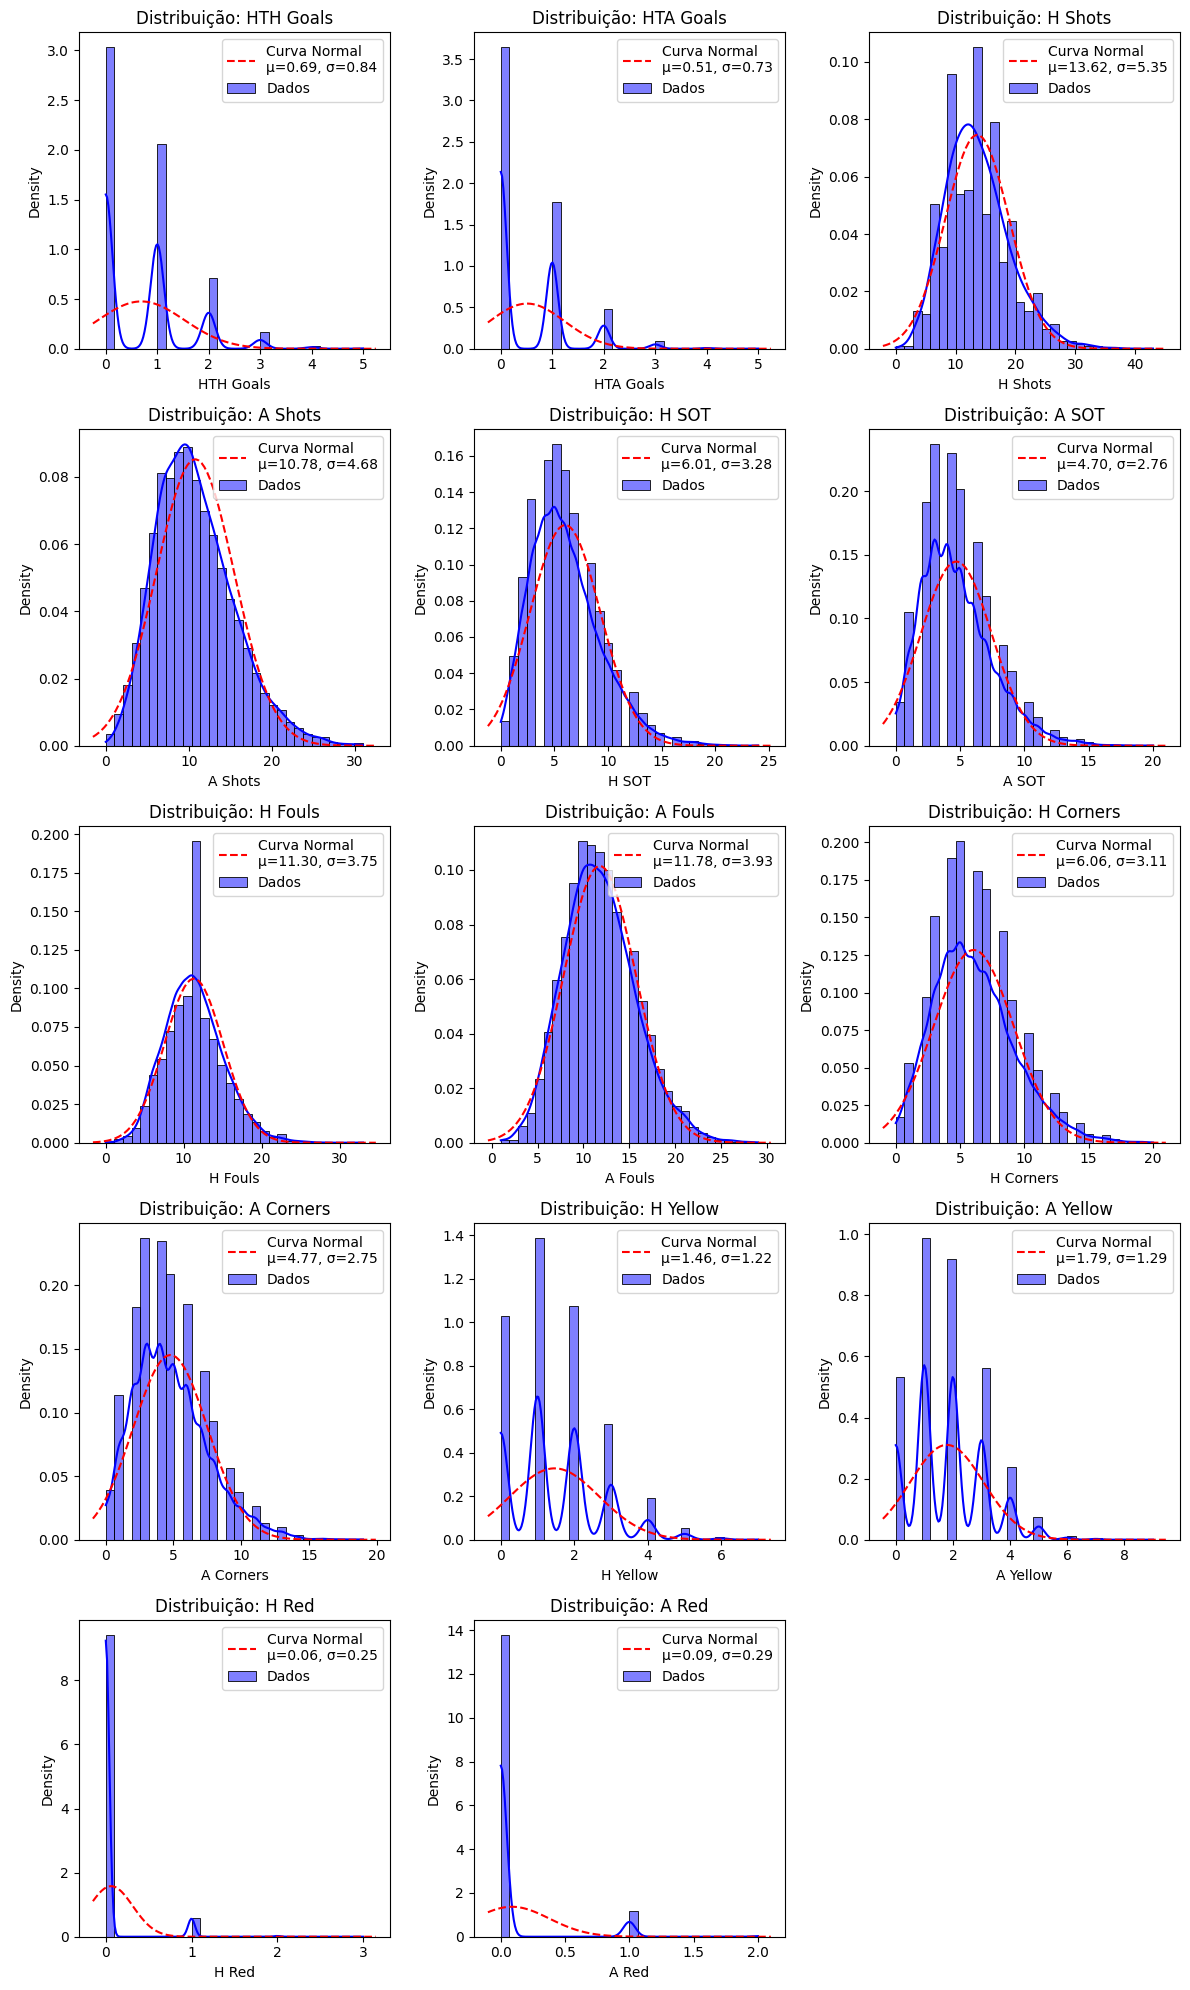

In [222]:
# Função para plotar gráficos com quantidade de gráficos por linha ajustável
def plot_normal_curves(numeric_cols, df, graphs_per_row=3):
    # Calcular o número de linhas necessário
    num_rows = math.ceil(len(numeric_cols) / graphs_per_row)
    
    # Ajustar o tamanho da figura dinamicamente
    plt.figure(figsize=(graphs_per_row * 4, num_rows * 4))
    
    # Iterar pelas colunas numéricas
    for i, col in enumerate(numeric_cols, start=1):
        plt.subplot(num_rows, graphs_per_row, i)  # Criar subplots com a quantidade de gráficos por linha definida
        
        # Remover valores nulos
        data = df[col].dropna()
        
        # Plotar o histograma com a curva normal
        sns.histplot(data, kde=True, stat="density", color="blue", bins=30, label="Dados")
        
        # Ajustar a curva normal
        mu, std = norm.fit(data)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'r--', label=f"Curva Normal\nμ={mu:.2f}, σ={std:.2f}")
        
        # Adicionar título e legenda
        plt.title(f"Distribuição: {col}")
        plt.legend()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Exemplo de uso
# Exclude 'Display_Order' from numeric_cols if it exists
numeric_cols_filtered = numeric_cols.drop('Display_Order', errors='ignore')

# Call the function with the filtered numeric columns
plot_normal_curves(numeric_cols_filtered, df, graphs_per_row=3)  # Altere graphs_per_row para ajustar a quantidade de gráficos por linha

**Observações:**

Boa característica da curva normal para: Faltas, chutes, SOT, escanteios.

Ao contrário de: Gols (total, 1T), cartões amarelos/vermelhos.

Por conta disso nosso modelo pode seguir: Regressão (ou séries gaussianas) ou modelos de contagem para tudo que é “zero‑inflated” (gols e cartões).

- Mapa de correlação

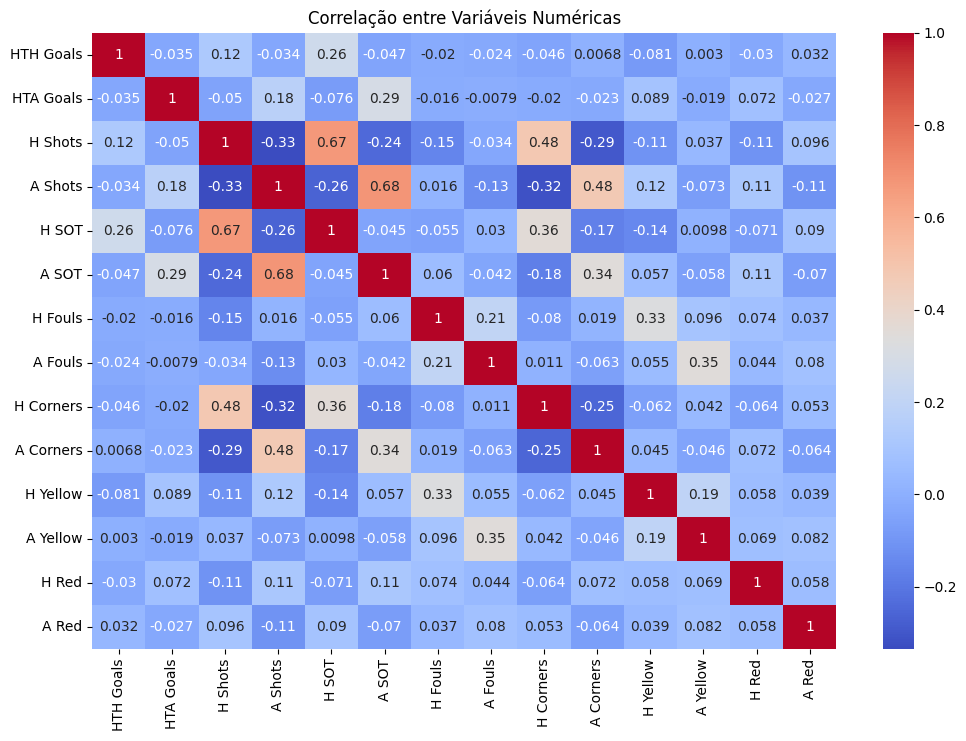

In [223]:
# Ajustar o tamanho da figura
plt.figure(figsize=(12, 8))  # Substitua os valores por largura e altura desejados

# Criar o heatmap
sns.heatmap(df_p.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Adicionar título
plt.title('Correlação entre Variáveis Numéricas')

# Exibir o gráfico
plt.show()

In [224]:
# Calcular a matriz de correlação
correlation_matrix = df_p.corr(numeric_only=True)

# Filtrar as correlações acima de 0.6 (excluindo a diagonal)
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Categoria 1', 'Categoria 2', 'Correlação']

# Remover duplicatas e correlações com a própria variável
correlation_pairs = correlation_pairs[
    (correlation_pairs['Categoria 1'] != correlation_pairs['Categoria 2']) &
    (correlation_pairs['Correlação'] >= 0.6)
]

# Ordenar por correlação em ordem decrescente
correlation_pairs = correlation_pairs.sort_values(by='Correlação', ascending=False)

# Exibir o DataFrame
correlation_pairs

,Categoria 1,Categoria 2,Correlação
47,A Shots,A SOT,0.680280
73,A SOT,A Shots,0.680280
32,H Shots,H SOT,0.670453
58,H SOT,H Shots,0.670453


In [225]:
colunas = correlation_pairs["Categoria 1"].unique()

print(f'Colunas que podem ser utilizadas para prever o resultado do jogo: {colunas}')

Colunas que podem ser utilizadas para prever o resultado do jogo: ['A Shots' 'A SOT' 'H Shots' 'H SOT']


### **Ultimos estudos para criação de hipóteses**

- Gráfico de dispersão para times que venceram em casa, fora de casa e empate

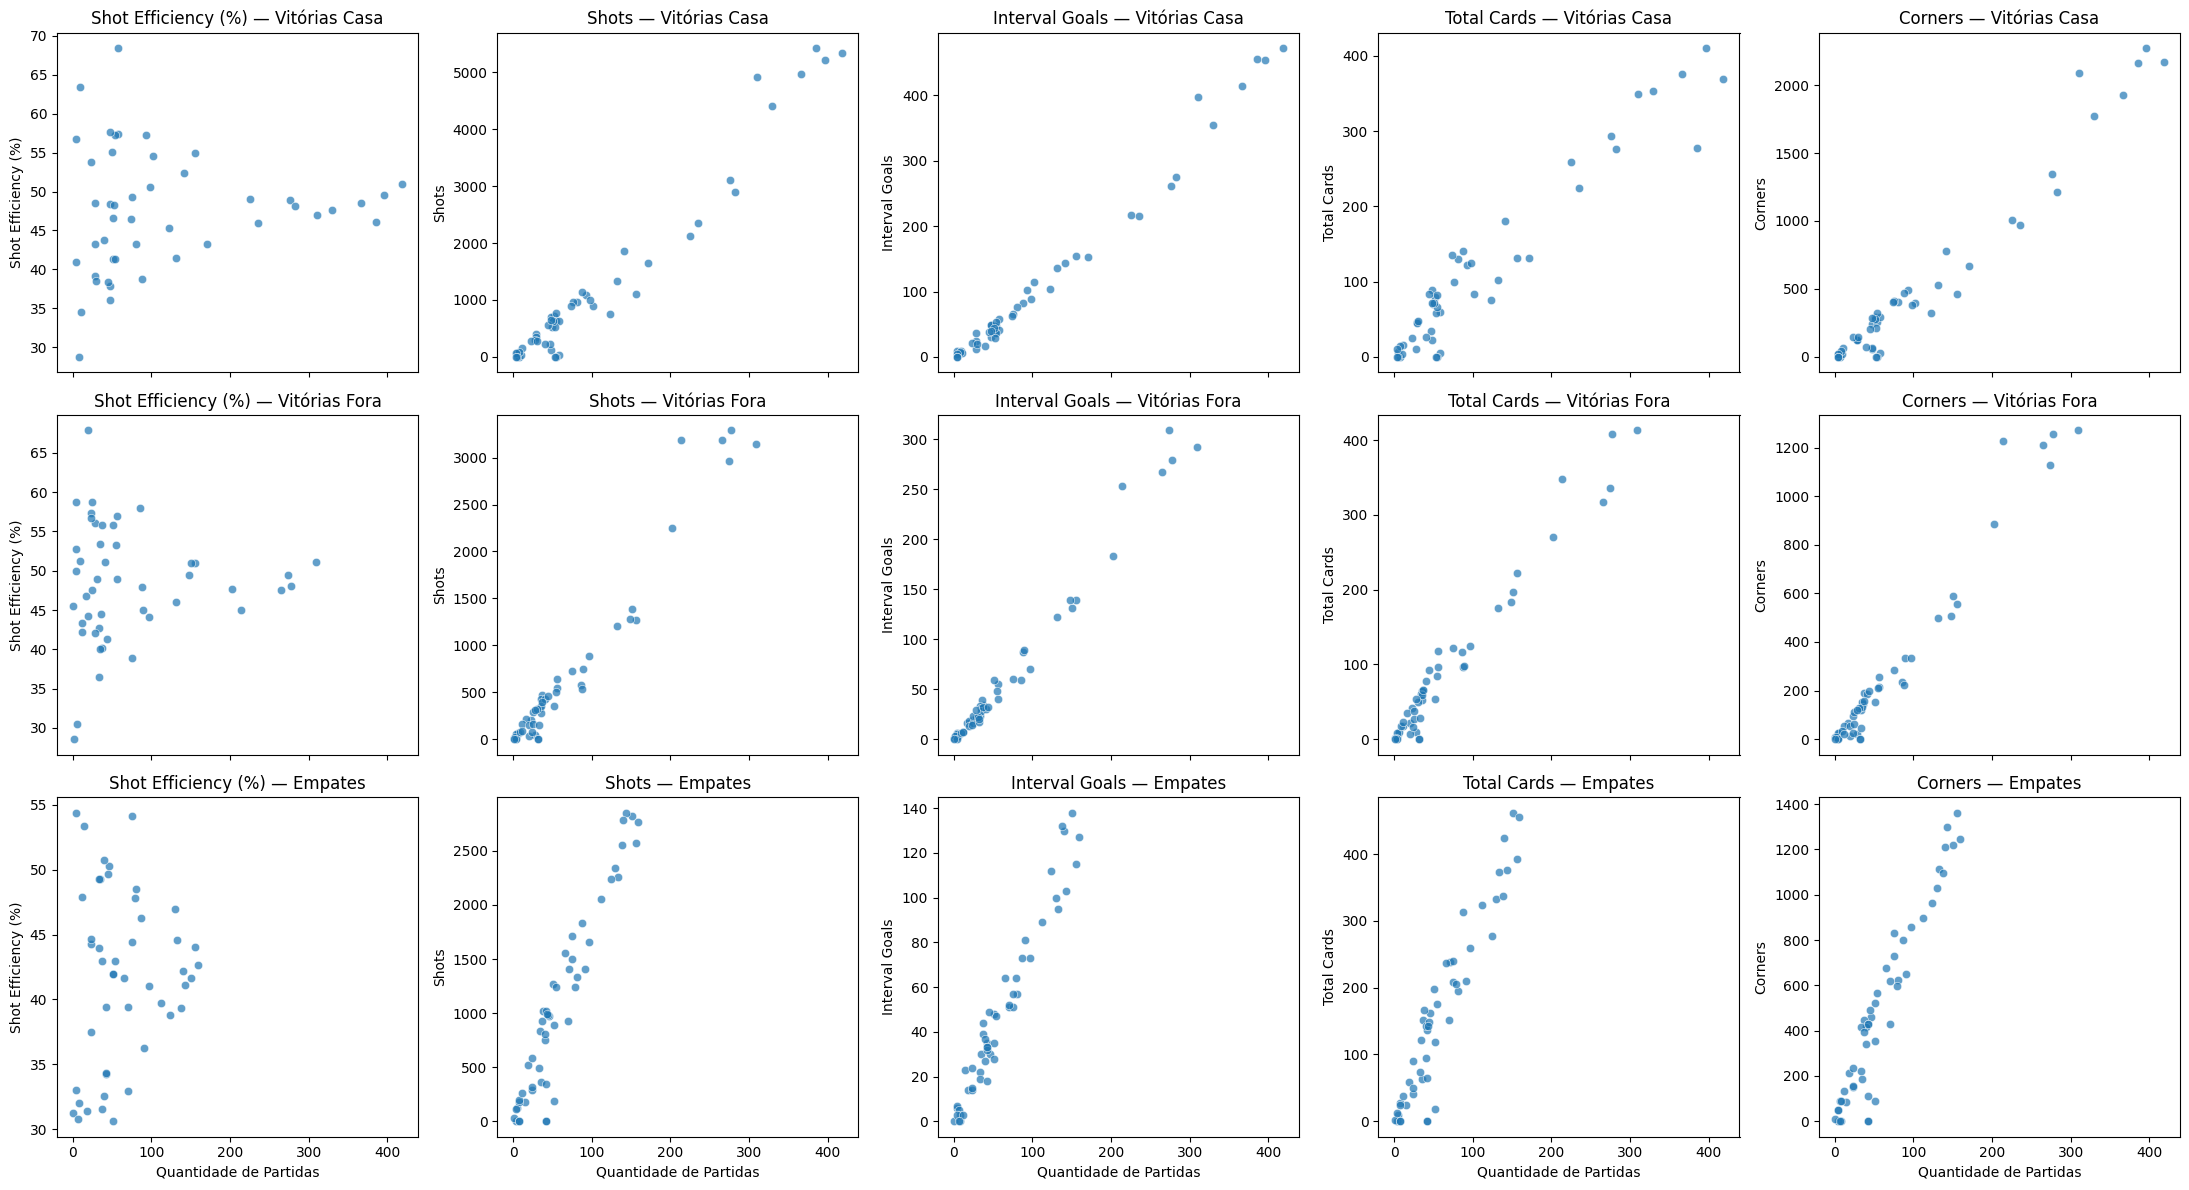

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definição dos três cenários: casa, fora e empates
scenarios = [
    {
        'label': 'Vitórias Casa',
        'result': 'H',
        'team_col': 'HomeTeam',
        'agg_cols': ['H SOT', 'H Shots', 'HTH Goals', 'H Yellow', 'H Red', 'H Corners'],
        'metrics': {
            'Shot Efficiency (%)': lambda g: g['H SOT'] / g['H Shots'] * 100,
            'Shots':               lambda g: g['H Shots'],
            'Interval Goals':      lambda g: g['HTH Goals'],
            'Total Cards':         lambda g: g['H Yellow'] + g['H Red'],
            'Corners':             lambda g: g['H Corners'],
        }
    },
    {
        'label': 'Vitórias Fora',
        'result': 'A',
        'team_col': 'AwayTeam',
        'agg_cols': ['A SOT', 'A Shots', 'HTA Goals', 'A Yellow', 'A Red', 'A Corners'],
        'metrics': {
            'Shot Efficiency (%)': lambda g: g['A SOT'] / g['A Shots'] * 100,
            'Shots':               lambda g: g['A Shots'],
            'Interval Goals':      lambda g: g['HTA Goals'],
            'Total Cards':         lambda g: g['A Yellow'] + g['A Red'],
            'Corners':             lambda g: g['A Corners'],
        }
    },
    {
        'label': 'Empates',
        'result': 'D',
        'team_col': 'HomeTeam',  # agrupa por time de casa nos empates
        'agg_cols': [
            'H SOT', 'A SOT', 'H Shots', 'A Shots',
            'HTH Goals', 'HTA Goals',
            'H Yellow', 'A Yellow', 'H Red', 'A Red',
            'H Corners', 'A Corners'
        ],
        'metrics': {
            'Shot Efficiency (%)': lambda g: (g['H SOT'] + g['A SOT']) / (g['H Shots'] + g['A Shots']) * 100,
            'Shots':               lambda g: g['H Shots'] + g['A Shots'],
            'Interval Goals':      lambda g: g['HTH Goals'] + g['HTA Goals'],
            'Total Cards':         lambda g: g['H Yellow'] + g['A Yellow'] + g['H Red'] + g['A Red'],
            'Corners':             lambda g: g['H Corners'] + g['A Corners'],
        }
    }
]

# Métricas na ordem desejada (todas as cotações têm as mesmas chaves)
metric_names = list(scenarios[0]['metrics'].keys())

# Prepara figura com 3 linhas x 5 colunas
fig, axes = plt.subplots(len(scenarios), len(metric_names),
                         figsize=(22, 12), sharex='col')

for i, scen in enumerate(scenarios):
    # 1) Filtrar partidas do tipo (H, A ou D)
    subset = df[df['FT Result'] == scen['result']]
    # 2) Somar estatísticas necessárias
    grouped = subset.groupby(scen['team_col'])[scen['agg_cols']].sum().reset_index()
    # 3) Contar resultados por time
    grouped['Wins'] = subset.groupby(scen['team_col']).size().values
    # 4) Calcular cada métrica
    for m in metric_names:
        grouped[m] = scen['metrics'][m](grouped)
    # 5) Plotar scatter em cada coluna
    for j, m in enumerate(metric_names):
        ax = axes[i, j]
        sns.scatterplot(data=grouped, x='Wins', y=m, alpha=0.7, ax=ax)
        ax.set_title(f"{m} — {scen['label']}")
        ax.set_xlabel('Quantidade de Partidas')
        ax.set_ylabel(m)

plt.tight_layout()
plt.show()


**Observações**

Existe um comportamento linear de vitórias relacionadas a gols no intervalo, total de cartões e escanteios, indicando a possibilidade de utilizarmos o modelo de regressão linear.

Em todos os casos, são retas crescente com exceção de Eficiência de chutes a gol (Total SOT/ Total Shots)

Em caso de jogos que ocorreram empates temos o coeficiente angular (m) mais maior.

In [227]:
# Filtrar os times vencedores (mandante e visitante)
wins_home = df[df['FT Result'] == 'H']
wins_away = df[df['FT Result'] == 'A']
total_wins = len(wins_home) + len(wins_away)

# 1) Percentual de times que venceram marcando gol no intervalo
# (para vitórias em casa, verificamos "HTH Goals > 0"; para vitórias fora, "HTA Goals > 0")
wins_goal_home = wins_home[wins_home['HTH Goals'] > 0]
wins_goal_away = wins_away[wins_away['HTA Goals'] > 0]
perc_goal = (len(wins_goal_home) + len(wins_goal_away)) / total_wins * 100

# 2) Percentual de times que venceram recebendo menos cartões
# (para vitórias em casa, se a soma dos cartões do time da casa é menor que a do visitante; vice‐versa para vitórias fora)
wins_less_cards_home = wins_home[(wins_home['H Yellow'] + wins_home['H Red']) < (wins_home['A Yellow'] + wins_home['A Red'])]
wins_less_cards_away = wins_away[(wins_away['A Yellow'] + wins_away['A Red']) < (wins_away['H Yellow'] + wins_away['H Red'])]
perc_less_cards = (len(wins_less_cards_home) + len(wins_less_cards_away)) / total_wins * 100

# 3) Percentual de times que venceram com mais escanteios
# (para vitórias em casa, se "H Corners" > "A Corners"; para vitórias fora, se "A Corners" > "H Corners")
wins_more_corners_home = wins_home[wins_home['H Corners'] > wins_home['A Corners']]
wins_more_corners_away = wins_away[wins_away['A Corners'] > wins_away['H Corners']]
perc_more_corners = (len(wins_more_corners_home) + len(wins_more_corners_away)) / total_wins * 100

print(f"Percentual de times que venceram marcando gol no intervalo: {perc_goal:.2f}%")
print(f"Percentual de times que venceram recebendo menos cartões: {perc_less_cards:.2f}%")
print(f"Percentual de times que venceram com mais escanteios: {perc_more_corners:.2f}%")


Percentual de times que venceram marcando gol no intervalo: 65.16%
Percentual de times que venceram recebendo menos cartões: 35.78%
Percentual de times que venceram com mais escanteios: 39.30%


### **Hipóteses**

_Para Vencer_
- fazer gol no primeiro tempo;
- H SOT/H Shots de 48,10%
- jogar em casa, em caso de times visitantes este critério diminuirá as chances;
- fazer menos faltas;
- tomar menos cartões amarelos e vermelhos;
- obter mais escanteios;

_Para Empate:_
- igualdade de gols no primeiro tempo;
- estatísticas de chutes, faltas, cartões e escanteios próximas, quase igualadas;

## **Definindo modelos que serão trabalhados**

Conforme os gráficos de dispersão e de curva Normal, iremos adotar o modelo de regressão linear, pois ele melhor se adequa a categorização que iremos fazer. No entanto, como estamos lidando com elementos categóricos, vamos comparar com o Random Forest.

## **Pré-processamento**

Nesta etapa foram utilizadas técnicas de pré-processamento de dados com o objetivo de preparar os dados para aplicação da técnicas de aprendizado de máquina.

Etapas realizadas: 

* Identificação de dados faltantes
* Pré-processamento das variáveis
* Criação de base de treinamento do modelo de regressão linear com dados dos jogos da Premier League do período de 1993 - 2022
* Criação de base de teste do modelo com os jogos da Premier League do período de 2023 - 2025

In [228]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import os

In [229]:
# Função auxiliar
def count_types(df):
    # Colunas numéricas (int, float, etc.)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Colunas de data/hora
    datetime_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns
    
    # Colunas categóricas (object, category)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    return f"numerica: {len(numeric_cols)}, categorica: {len(categorical_cols)}, datetime:{len(datetime_cols)}"

# Obtém o diretório de trabalho atual
current_dir = os.getcwd()

parent_dir = os.path.dirname(current_dir)

# Constrói o caminho completo para o arquivo CSV
csv_path1 = os.path.join(parent_dir, 'base_de_dados', 'England 2 CSV.csv')

csv_path2 = os.path.join(parent_dir, 'base_de_dados', 'England CSV.csv')

df_e1 = pd.read_csv(csv_path1)

df_e2 = pd.read_csv(csv_path2)

df = pd.concat([df_e1, df_e2])

df = df[df['League'] == 'Premier League']

df = df.drop(columns=['FTH Goals', 'FTA Goals'])

# Converter colunas numéricas para float
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].astype(float)

# Converter a coluna "Date" para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Converter colunas categóricas para string
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].astype(str)

df_trein = df[(df['Season'] != '2024/25') & (df['Season'] != '2023/24')].reset_index(drop=True)
df_teste = df[(df['Season'] == '2024/25') | (df['Season'] == '2023/24')].reset_index(drop=True)

In [230]:
display(df_trein.head(2))
display(df_teste.head(2))

,Date,Season,HomeTeam,AwayTeam,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,2023-05-28,2022/23,Arsenal,Wolves,H,3.0,0.0,H,A Marriner,14.0,...,8.0,11.0,8.0,4.0,0.0,0.0,0.0,0.0,20230528.0,Premier League
1,2023-05-28,2022/23,Aston Villa,Brighton,H,2.0,1.0,H,D Coote,12.0,...,15.0,16.0,4.0,3.0,4.0,4.0,0.0,0.0,20230528.0,Premier League


,Date,Season,HomeTeam,AwayTeam,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,2025-01-16,2024/25,Ipswich Town,Brighton & Hove Albion,A,0.0,1.0,A,T Harrington,5.0,...,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116.0,Premier League
1,2025-01-16,2024/25,Man United,Southampton,H,0.0,1.0,A,J Brooks,23.0,...,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116.0,Premier League


In [231]:
print(f'Arquivo de treinamento: {count_types(df_trein)} - Arquivo de teste: {count_types(df_teste)}')

Arquivo de treinamento: numerica: 15, categorica: 7, datetime:1 - Arquivo de teste: numerica: 15, categorica: 7, datetime:1


In [232]:
save_path_trein = os.path.join(parent_dir, 'base_de_dados', 'treinamento.csv')

save_path_teste = os.path.join(parent_dir, 'base_de_dados', 'teste.csv')

df_trein.to_csv(save_path_trein, index=False)

df_teste.to_csv(save_path_teste, index=False)

## **Modelagem: Regressão Linear**

In [238]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import os
from sklearn.ensemble import RandomForestClassifier

In [239]:
# Obtém o diretório de trabalho atual
current_dir = os.getcwd()

parent_dir = os.path.dirname(current_dir)

# Constrói o caminho completo para o arquivo CSV
trein = os.path.join(parent_dir, 'base_de_dados', 'treinamento.csv')

teste = os.path.join(parent_dir, 'base_de_dados', 'teste.csv')

train = pd.read_csv(trein)

test = pd.read_csv(teste)

In [255]:
def add_ft_result_ml_linear(train_df: pd.DataFrame, test_df: pd.DataFrame) -> pd.DataFrame:

    train_df['H Cards'] = train_df['H Yellow'] + train_df['H Red']

    train_df['A Cards'] = train_df['A Yellow'] + train_df['A Red']

    test_df['H Cards'] = test_df['H Yellow'] + test_df['H Red']

    test_df['A Cards'] = test_df['A Yellow'] + test_df['A Red']

    # Features selecionadas
    features = [
    'A Shots', 'H Shots', 'H Fouls', 'A Fouls',
    'H Corners', 'A Corners', 'H Cards', 'A Cards',
    'HTH Goals', 'HTA Goals']
    
    # Preparação dos dados
    X_train = train_df[features].copy()
    X_test = test_df[features].copy()
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Codifica 'FT Result' em numérico
    le = LabelEncoder()
    y_train = le.fit_transform(train_df['FT Result'])
    
    # Treina Regressão Linear
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    # Prediz e arredonda ao mais próximo
    y_pred_cont = reg.predict(X_test)
    y_pred_round = np.clip(np.round(y_pred_cont), 0, len(le.classes_)-1).astype(int)
    
    # Decodifica para rótulos originais
    pred_labels = le.inverse_transform(y_pred_round)
    
    # Adiciona ao DataFrame de teste
    result_df = test_df.copy()
    result_df['FT Result_ML'] = pred_labels
    
    return result_df


def add_ft_result_ml_rf(train_df: pd.DataFrame, test_df: pd.DataFrame, n_estimators: int = 100, max_depth: int = None, random_state: int = 42) -> pd.DataFrame:

    # Cria colunas de cartões
    train_df = train_df.copy()

    test_df  = test_df.copy()

    train_df['H Cards'] = train_df['H Yellow'] + train_df['H Red']

    train_df['A Cards'] = train_df['A Yellow'] + train_df['A Red']

    test_df ['H Cards'] = test_df ['H Yellow'] + test_df ['H Red']

    test_df ['A Cards'] = test_df ['A Yellow'] + test_df ['A Red']

    # Lista de features corrigida (com vírgula entre 'A Shots' e 'H Shots')
    features = [
        'A Shots', 'H Shots', 'H Fouls', 'A Fouls',
        'H Corners', 'A Corners', 'H Cards', 'A Cards',
        'HTH Goals', 'HTA Goals'
    ]

    # Prepara dados
    X_train = train_df[features].copy()
    X_test  = test_df[features].copy()
    
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test  = imputer.transform(X_test)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test  = scaler.transform(X_test)
    
    # Codifica rótulos
    le = LabelEncoder()
    y_train = le.fit_transform(train_df['FT Result'])
    
    # Treina Random Forest
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state
    )
    clf.fit(X_train, y_train)
    
    # Prediz classes
    y_pred = clf.predict(X_test)
    pred_labels = le.inverse_transform(y_pred)
    
    # Adiciona ao DataFrame de teste
    result_df = test_df.copy()
    result_df['FT Result_RF'] = pred_labels
    
    return result_df


In [256]:
df_t = df_pred_linear.copy()

df_t['match'] = (df_t['FT Result'] == df_t['FT Result_ML']).astype(int)

In [257]:
(df_t['match'].sum()/len(df_t['match'])) * 100

np.float64(51.95246179966044)

In [258]:
df_pred_rf = add_ft_result_ml_rf(train, test, n_estimators=200, max_depth=10)
df_rf = df_pred_rf.copy()

In [259]:
df_rf['match'] = (df_rf['FT Result'] == df_rf['FT Result_RF']).astype(int)
(df_rf['match'].sum()/len(df_rf['match'])) * 100


np.float64(60.611205432937176)